<a href="https://colab.research.google.com/github/Atanu-2002/cognifyz-Internship-tasks/blob/main/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Drive again
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [4]:
df=pd.read_csv("final_data.csv")

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,Address,Locality,Locality Verbose,Longitude,Latitude,Average Cost for two,Currency,...,"Cuisines_Western, Fusion, Fast Food",Cuisines_World Cuisine,"Cuisines_World Cuisine, Mexican, Italian","Cuisines_World Cuisine, Patisserie, Cafe",Has Table booking_No,Has Table booking_Yes,Has Online delivery_No,Has Online delivery_Yes,Is delivering now_No,Is delivering now_Yes
0,6317637,Le Petit Souffle,162,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,1100,Botswana Pula(P),...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,6304287,Izakaya Kikufuji,162,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,1200,Botswana Pula(P),...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,6300002,Heat - Edsa Shangri-La,162,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,4000,Botswana Pula(P),...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,6318506,Ooma,162,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,1500,Botswana Pula(P),...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,6314302,Sambo Kojin,162,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,1500,Botswana Pula(P),...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [6]:
from sklearn.model_selection import train_test_split

In [9]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)



In [11]:
train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)


In [12]:
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
df.drop(['Restaurant ID', 'URL', 'Address'], axis=1, inplace=True, errors='ignore')

In [16]:
# Show non-numeric columns in your features
X_train.select_dtypes(include='object').columns


Index(['Restaurant Name', 'Address', 'Locality', 'Locality Verbose',
       'Currency', 'Switch to order menu', 'Rating color', 'Rating text'],
      dtype='object')

In [18]:
from sklearn.preprocessing import LabelEncoder

# Concatenate train and test to encode together
combined = pd.concat([X_train, X_test])

label_encoders = {}

for col in combined.select_dtypes(include='object').columns:
    le = LabelEncoder()
    combined[col] = le.fit_transform(combined[col].astype(str))
    label_encoders[col] = le

# Split back to X_train and X_test
X_train = combined.iloc[:len(X_train)].copy()
X_test = combined.iloc[len(X_train):].copy()



In [19]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [20]:
y_pred = model.predict(X_test)


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predictions
y_pred = model.predict(X_test)

# Manually compute RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Other metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"R² Score       : {r2:.4f}")
print(f"Root MSE (RMSE): {rmse:.4f}")
print(f"Mean Abs Error : {mae:.4f}")



R² Score       : 0.9869
Root MSE (RMSE): 0.1708
Mean Abs Error : 0.1195


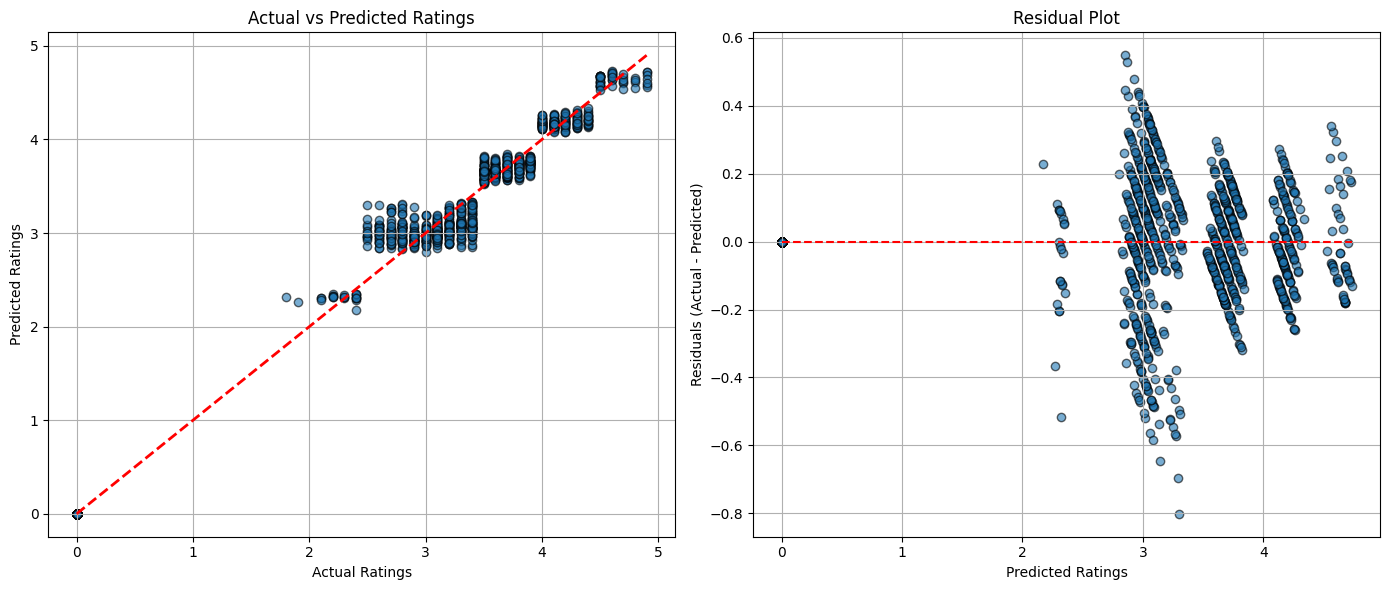

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Predictions
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(14, 6))

# 1. Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.grid(True)

# 2. Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.6, edgecolor='k')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='--')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True)

plt.tight_layout()
plt.show()


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your model is trained and X_train is your feature DataFrame

# Get feature importances from the model
importances = model.feature_importances_

# Create a DataFrame for easy plotting
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


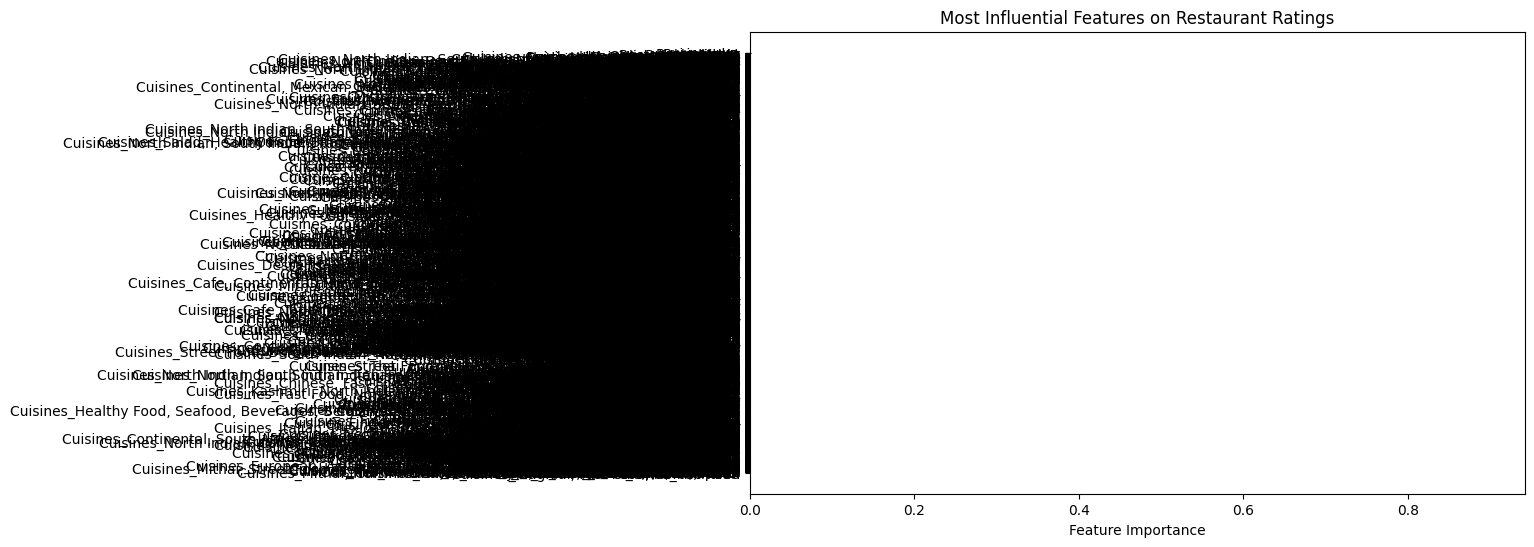

In [26]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()  # highest importance on top
plt.xlabel('Feature Importance')
plt.title('Most Influential Features on Restaurant Ratings')
plt.show()


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

importances = model.feature_importances_
feat_imp = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)



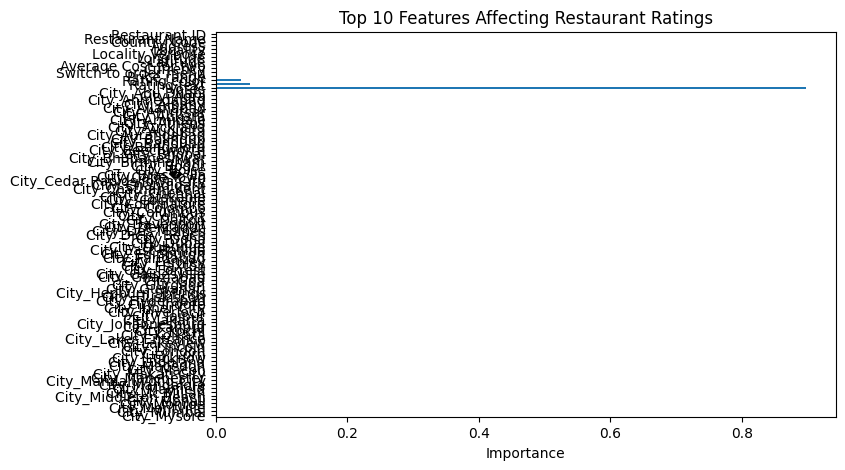

In [33]:
feat_imp[:100].plot(kind='barh', figsize=(8,5))
plt.gca().invert_yaxis()
plt.title('Top 10 Features Affecting Restaurant Ratings')
plt.xlabel('Importance')
plt.show()


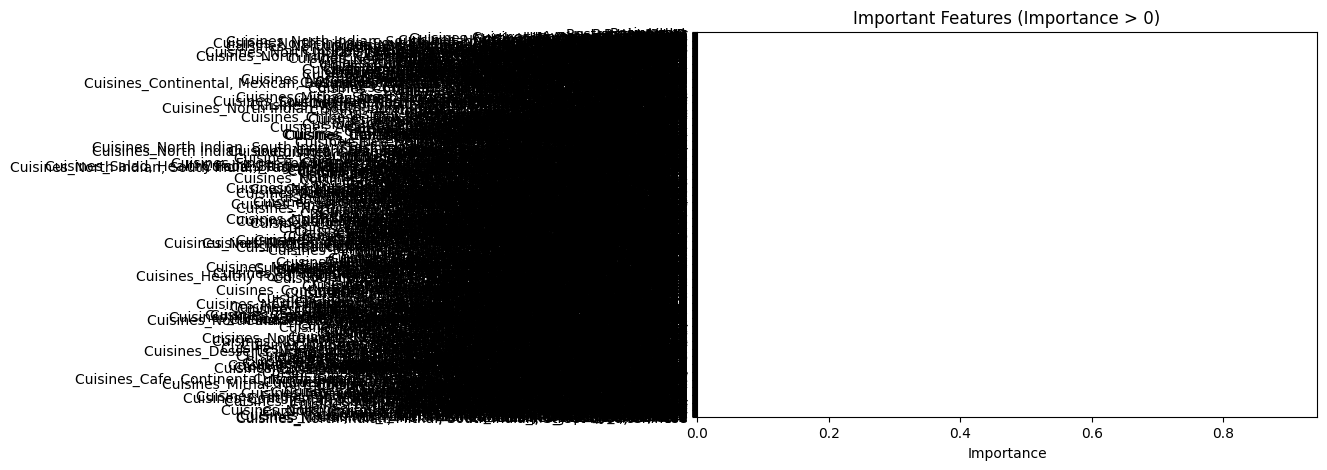

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

importances = model.feature_importances_
feat_imp = pd.Series(importances, index=X_train.columns)

# Filter to keep only features with importance > 0
feat_imp_nonzero = feat_imp[feat_imp > 0].sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
feat_imp_nonzero.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Important Features (Importance > 0)')
plt.xlabel('Importance')
plt.show()


In [31]:
import pandas as pd

importances = model.feature_importances_
feat_imp = pd.Series(importances, index=X_train.columns)

# Filter non-zero importance features and sort descending
feat_imp_nonzero = feat_imp[feat_imp > 0].sort_values(ascending=False)

# Convert to DataFrame for neat display
important_features_df = pd.DataFrame({
    'Feature': feat_imp_nonzero.index,
    'Importance': feat_imp_nonzero.values
})

print(important_features_df.reset_index(drop=True))


                                                Feature    Importance
0                                                 Votes  8.975934e-01
1                                           Rating text  5.220316e-02
2                                          Rating color  3.822952e-02
3                                         Restaurant ID  2.273407e-03
4                                       Restaurant Name  1.156632e-03
...                                                 ...           ...
1200                    Cuisines_North Indian, Kashmiri  1.081380e-20
1201                      Cuisines_Pizza, Italian, Cafe  1.056639e-20
1202  Cuisines_Mithai, North Indian, South Indian, C...  8.910623e-21
1203                         Cuisines_Japanese, Chinese  7.493888e-21
1204  Cuisines_North Indian, Mithai, South Indian, S...  6.745194e-21

[1205 rows x 2 columns]
